importing necessary libraries












In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
# import the time module
import time

In [3]:

d=pd.read_csv(r"C:\Users\Mahum\Downloads\Penmanshiel_SCADA_2021_WT01-10_4460\mydata.csv")
pd.set_option('display.max_columns', None)
# to display all columns in the dataset
#pd.set_option('display.max_rows', None)

In [4]:
df=pd.DataFrame(d)
df

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Virtual Production (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power MPC (kW),Potential Power Energy Budget (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Unnamed: 53,Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),"Nacelle temperature, Max (°C)","Nacelle temperature, Min (°C)","Generator bearing front temperature, Max (°C)","Generator bearing front temperature, Min (°C)","Generator bearing rear temperature, Max (°C)","Generator bearing rear temperature, Min (°C)","Generator bearing front temperature, Std (°C)","Generator bearing rear temperature, Std (°C)","Nacelle temperature, Standard deviation (°C)","Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)","Hub temperature, min (°C)","Hub temperature, max (°C)","Hub temperature, standard deviation (°C)","Ambient temperature (converter), Max (°C)","Ambient temperature (converter), Min (°C)","Ambient temperature (converter), StdDev (°C)","Gear oil inlet temperature, Max (°C)","Gear oil inlet temperature, Min (°C)","Gear oil inlet temperature, StdDev (°C)","Nacelle ambient temperature, Max (°C)","Nacelle ambient temperature, Min (°C)","Nacelle ambient temperature, StdDev (°C)","Rotor bearing temp, Max (°C)","Rotor bearing temp, Min (°C)","Rotor bearing temp, StdDev (°C)","CPU temperature, Max (°C)","CPU temperature, Min (°C)","CPU temperature, StdDev (°C)","Transformer cell temperature, Max (°C)","Transformer cell temperat

In [5]:
df=df.drop(['Unnamed: 53'], axis=1)

In [6]:
df.isnull().sum()

Wind speed (m/s)                          63
Wind speed, Standard deviation (m/s)     226
Wind speed, Minimum (m/s)                226
Wind speed, Maximum (m/s)                226
Long Term Wind (m/s)                       0
                                        ... 
Temperature motor axis 2, Min (°C)       226
Temperature motor axis 2, StdDev (°C)    226
Temperature motor axis 3, Max (°C)       226
Temperature motor axis 3, Min (°C)       226
Temperature motor axis 3, StdDev (°C)    226
Length: 137, dtype: int64

In [7]:
df.shape

(52560, 137)

In [8]:
df=df.apply(lambda x: x.fillna(x.mean()))

In [9]:
df.isnull().sum()

Wind speed (m/s)                         0
Wind speed, Standard deviation (m/s)     0
Wind speed, Minimum (m/s)                0
Wind speed, Maximum (m/s)                0
Long Term Wind (m/s)                     0
                                        ..
Temperature motor axis 2, Min (°C)       0
Temperature motor axis 2, StdDev (°C)    0
Temperature motor axis 3, Max (°C)       0
Temperature motor axis 3, Min (°C)       0
Temperature motor axis 3, StdDev (°C)    0
Length: 137, dtype: int64

In [10]:
# creating a new data frame with variable bearing temp
temp=df[["Front bearing temperature (°C)"]]

In [11]:
temp

,Front bearing temperature (°C)
0,67.534999
1,70.333334
2,73.975864
3,69.183871
4,67.589656
...,...
52555,71.971668
52556,69.255001
52557,73.725001
52558,71.519999


Converting dataframe to list

In [12]:
x=temp.values.tolist()

In [13]:
x # got a 2d list 

[[67.53499934],
 [70.33333384],
 [73.97586375],
 [69.18387112],
 [67.58965591],
 [72.74333369],
 [72.70370342],
 [68.10166601],
 [68.81666692],
 [74.07500025],
 [70.23666611],
 [69.83333384],
 [74.3896537],
 [69.77666575],
 [68.59833323],
 [73.62166672],
 [71.36000086],
 [67.88965554],
 [72.98461533],
 [71.6683342],
 [68.79833323],
 [73.95333201],
 [70.62166672],
 [68.91000036],
 [74.01333415],
 [70.1666659],
 [69.37833354],
 [74.11896462],
 [70.65000021],
 [67.89166768],
 [73.23166707],
 [71.37166621],
 [67.59333344],
 [71.38833338],
 [73.19333394],
 [68.48103464],
 [68.21333415],
 [73.68499883],
 [69.73166631],
 [68.33333257],
 [73.84166692],
 [70.68666738],
 [69.66999944],
 [73.97833328],
 [69.13166682],
 [70.11333415],
 [74.00666606],
 [69.02166595],
 [70.92999969],
 [73.6616656],
 [68.85999908],
 [73.01666641],
 [71.78500061],
 [67.90000076],
 [70.31499939],
 [73.81499964],
 [68.84833374],
 [68.68166707],
 [73.75416692],
 [61.373662658053306],
 [70.42999954],
 [73.59000041],
 [72.

Converting 2d list into 1d list 

In [14]:
t = [j for sub in x for j in sub]
t

[67.53499934,
 70.33333384,
 73.97586375,
 69.18387112,
 67.58965591,
 72.74333369,
 72.70370342,
 68.10166601,
 68.81666692,
 74.07500025,
 70.23666611,
 69.83333384,
 74.3896537,
 69.77666575,
 68.59833323,
 73.62166672,
 71.36000086,
 67.88965554,
 72.98461533,
 71.6683342,
 68.79833323,
 73.95333201,
 70.62166672,
 68.91000036,
 74.01333415,
 70.1666659,
 69.37833354,
 74.11896462,
 70.65000021,
 67.89166768,
 73.23166707,
 71.37166621,
 67.59333344,
 71.38833338,
 73.19333394,
 68.48103464,
 68.21333415,
 73.68499883,
 69.73166631,
 68.33333257,
 73.84166692,
 70.68666738,
 69.66999944,
 73.97833328,
 69.13166682,
 70.11333415,
 74.00666606,
 69.02166595,
 70.92999969,
 73.6616656,
 68.85999908,
 73.01666641,
 71.78500061,
 67.90000076,
 70.31499939,
 73.81499964,
 68.84833374,
 68.68166707,
 73.75416692,
 61.373662658053306,
 70.42999954,
 73.59000041,
 72.21333338,
 68.38000005,
 71.6149999,
 73.47333374,
 73.45,
 68.79310319,
 72.19999949,
 74.15166626,
 72.41499939,
 69.850000

Finding mean and standard deviation 

In [15]:
w_size=30 # so window length is 30 and no of windows is 1752
j=0
i=0
l=0
M=0 # for collecting mean value
S=0 # for collecting standard deviation 
mean=[]# collecting mean values of 1000 points so in total 5000 means
stand=[]
y=[] # for collecting those points for mean

for i in range(0,1752,1):
    M=np.mean(t[j:w_size])
    S=np.std(t[j:w_size])
    mean.append(M)
    stand.append(S)
    M=0
    S=0
    j+=30
    w_size+=30
     


        
    
  
        

In [16]:
print(mean)

[70.79731059833334, 70.62046207026846, 71.40934133333334, 70.34372183066667, 69.61390657233332, 69.84901313133334, 70.91321070599999, 71.29872968633336, 70.66772211566666, 70.68116254899999, 70.71259124600002, 67.69776371633333, 60.23768828333334, 67.29034254533333, 67.13239564361065, 69.24607479533333, 70.91228688333332, 68.88363810700001, 67.97291510199999, 67.13326823800001, 69.95248404, 69.35174949633331, 68.39790813266669, 66.62556217666668, 59.16423172166666, 45.654554103, 38.26394244966666, 28.796707725333327, 54.612421309666665, 63.92290321233334, 63.990718485, 66.39932753800001, 69.23370895866665, 69.29553257266666, 69.40442541166667, 69.36861712266666, 67.80580939866667, 63.46429143333333, 53.027666593333336, 60.15473658566667, 59.416122697999995, 71.19870775600002, 70.48539004100002, 69.33036549999998, 54.27732403266668, 68.65851711433334, 70.547275843, 70.82208233566666, 71.29673320233334, 70.98716352433333, 70.53591405633333, 70.11008634166666, 67.14050020333333, 69.488134

In [17]:
print(stand)

[2.275413717690751, 2.7571641613336313, 1.9617644912388772, 1.9048692037430797, 2.3689261846093324, 1.6284777681378202, 2.1022014461476886, 2.0641829889340926, 2.158128009878399, 2.230011915055836, 2.277734746050275, 4.626746937608696, 2.766448399011377, 2.369750228623604, 3.179144537618007, 2.9033728795505627, 2.09517243859266, 2.2354193380788248, 2.891001033127876, 2.2937874318501845, 2.2803553301287596, 1.8420854131522582, 1.4128931403547527, 2.867511511742461, 4.022215567472893, 7.465262163494582, 7.700153243476725, 5.576837190819001, 8.259907570748691, 3.9061333084370355, 2.0133698384522067, 3.245176221280794, 1.7921881962501758, 2.260509240471884, 2.2661526214444385, 2.7369069553962753, 2.5233027981761253, 1.146991699689388, 4.664752080736365, 5.2522893932211385, 6.590730264693525, 2.5112669717244076, 2.1447920925526973, 2.63133661170155, 8.670215462496238, 3.3416031119970904, 2.3914925445423574, 2.438420466698996, 2.384135577789246, 2.27604209630892, 2.4138269186233474, 2.242896

In [18]:
print("length of mean ",len(mean))

length of mean  1752


In [19]:
print("length of standard deviation ",len(stand))

length of standard deviation  1752


Classifying into 0 and 1

In [20]:
alpha=3
w_size=30
k=0
j=0
i=0
label=[] # list for holding labels 
for i in range(0,1752,1):
    for j in range(w_size):
        if j < len(mean) and j < len(stand):
            ut = mean[i] + alpha * stand[i]
            lt = mean[i] - alpha * stand[i]
            if lt < t[j] < ut:
                label.append(0)

            else:
                label.append(1)
        
   


In [21]:
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
len(label)

52560

conversion of list into data frame 

In [23]:
df['class labels']=label
df

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Virtual Production (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power MPC (kW),Potential Power Energy Budget (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),"Nacelle temperature, Max (°C)","Nacelle temperature, Min (°C)","Generator bearing front temperature, Max (°C)","Generator bearing front temperature, Min (°C)","Generator bearing rear temperature, Max (°C)","Generator bearing rear temperature, Min (°C)","Generator bearing front temperature, Std (°C)","Generator bearing rear temperature, Std (°C)","Nacelle temperature, Standard deviation (°C)","Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)","Hub temperature, min (°C)","Hub temperature, max (°C)","Hub temperature, standard deviation (°C)","Ambient temperature (converter), Max (°C)","Ambient temperature (converter), Min (°C)","Ambient temperature (converter), StdDev (°C)","Gear oil inlet temperature, Max (°C)","Gear oil inlet temperature, Min (°C)","Gear oil inlet temperature, StdDev (°C)","Nacelle ambient temperature, Max (°C)","Nacelle ambient temperature, Min (°C)","Nacelle ambient temperature, StdDev (°C)","Rotor bearing temp, Max (°C)","Rotor bearing temp, Min (°C)","Rotor bearing temp, StdDev (°C)","CPU temperature, Max (°C)","CPU temperature, Min (°C)","CPU temperature, StdDev (°C)","Transformer cell temperature, Max (°C)","Transformer cell temperature, Min (°C

In [ ]:
sns.countplot(df['class labels'])

<Axes: ylabel='count'>

Error in callback <function _draw_all_if_interactive at 0x0000028E2875F100> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [24]:
X=df[['Wind speed (m/s)','Power (kW)','Front bearing temperature (°C)','Rear bearing temperature (°C)','Nacelle temperature (°C)','Nacelle temperature (°C)','Gear oil inlet temperature (°C)','Gear oil temperature (°C)','Rotor bearing temp (°C)','Gear oil inlet temperature, StdDev (°C)']]

In [25]:
X

,Wind speed (m/s),Power (kW),Front bearing temperature (°C),Rear bearing temperature (°C),Nacelle temperature (°C),Nacelle temperature (°C),Gear oil inlet temperature (°C),Gear oil temperature (°C),Rotor bearing temp (°C),"Gear oil inlet temperature, StdDev (°C)"
0,13.627191,2037.502873,67.534999,60.026667,9.090000,9.090000,32.038333,55.500000,28.950000,0.540013
1,13.495296,2010.745451,70.333334,61.261667,9.563333,9.563333,49.581667,57.315000,28.990000,5.584599
2,12.995932,1974.779594,73.975864,63.718966,9.668965,9.668965,45.624137,59.187931,29.093104,10.732561
3,12.508251,1958.147563,69.183871,61.275807,9.111667,9.111667,32.253333,56.361290,29.053226,0.298590
4,14.027196,2016.503349,67.589656,59.813793,9.146667,9.146667,36.763333,55.520689,29.043103,7.385289
...,...,...,...,...,...,...,...,...,...,...
52555,10.503650,1555.897095,71.971668,62.066667,14.275000,14.275000,31.608333,56.868333,31.758333,2.067732
52556,10.074575,1348.674803,69.255001,60.156667,14.053333,14.053333,36.563334,55.525000,31.845000,8.260760
52557,10.264610,1414.735852,73.725001,62.945000,14.336667,14.336667,52.400000,58.526667,31.983333,4.417390
52558,9.741830,1373.458518,71.519999,61.678333,13.936666,13.936666,30.828333,56.368333,32.111666,1.403192


In [26]:
Y=df[['class labels']]

In [27]:
Y

,class labels
0,0
1,0
2,0
3,0
4,0
...,...
52555,0
52556,0
52557,0
52558,0


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have a dataset X (features) and y (labels/targets)

# Step 1: Split the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Check the shapes of the resulting sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_valid.shape, y_valid.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)


Training set shapes: (42048, 10) (42048, 1)
Validation set shapes: (5256, 10) (5256, 1)
Testing set shapes: (5256, 10) (5256, 1)


Logistic regression

C:\Users\Mahum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mahum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix (Validation Set):
 [[3146  541]
 [ 531 1038]]
Confusion Matrix (Test Set):
 [[3165  532]
 [ 526 1033]]
Accuracy (Validation Set): 0.7960426179604262
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      3687
           1       0.66      0.66      0.66      1569

    accuracy                           0.80      5256
   macro avg       0.76      0.76      0.76      5256
weighted avg       0.80      0.80      0.80      5256

Accuracy (Test Set): 0.7987062404870624
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      3697
           1       0.66      0.66      0.66      1559

    accuracy                           0.80      5256
   macro avg       0.76      0.76      0.76      5256
weighted avg       0.80      0.80      0.80      5256



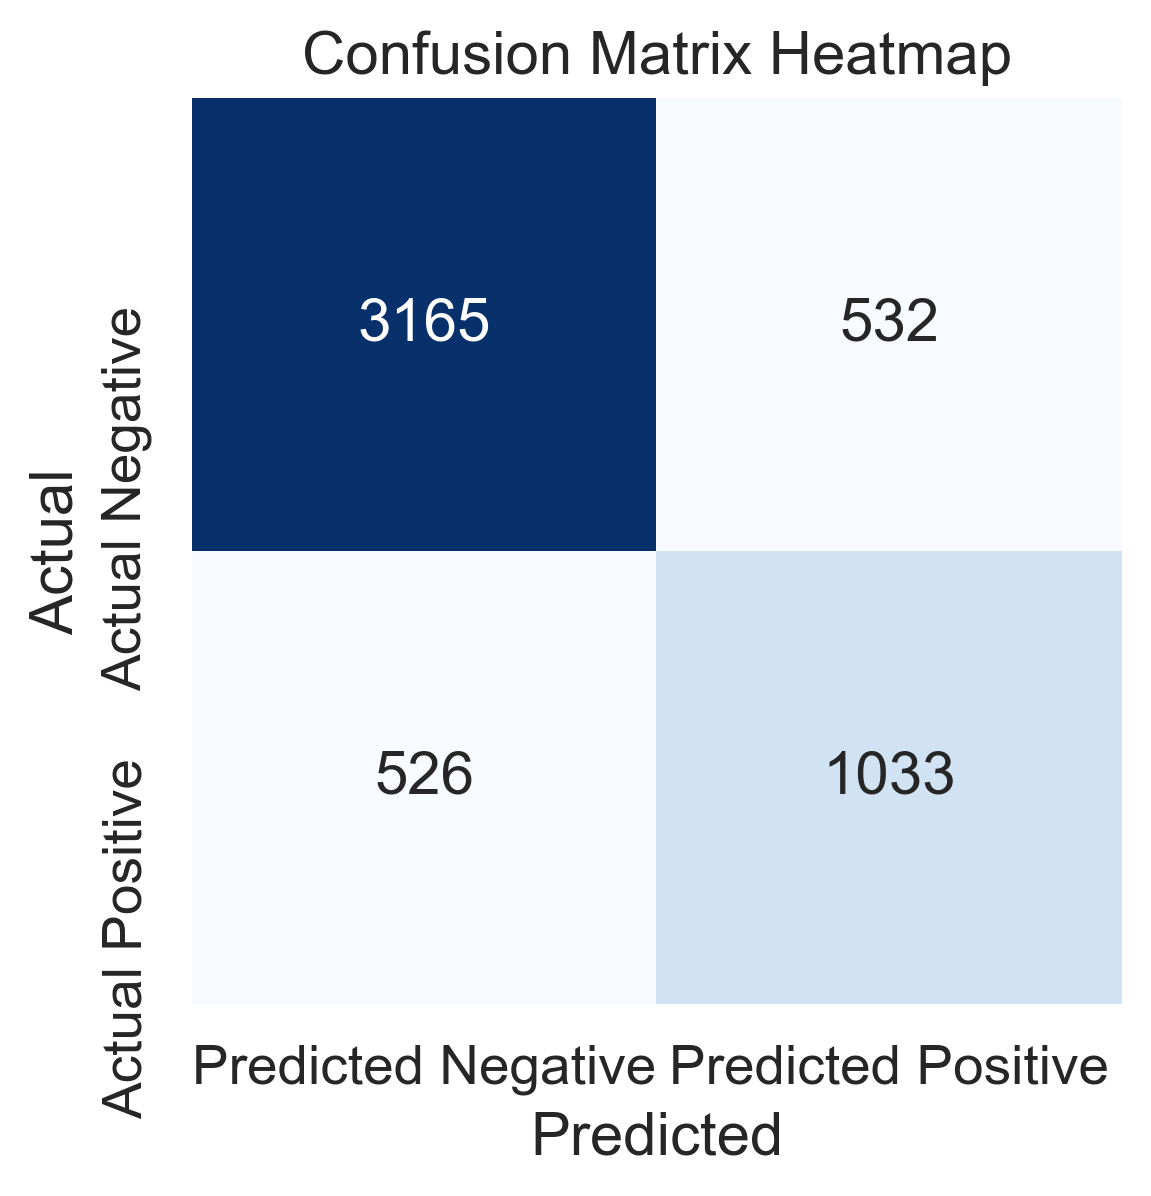

Compile time  0.0


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


model = LogisticRegression()

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Step 5: Make predictions on the test set
y_test_pred = model.predict(X_test)

# Step 6: Compute confusion matrices and evaluate the model on both validation and test sets
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Step 7: Display the confusion matrices
print("Confusion Matrix (Validation Set):\n", conf_matrix_valid)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

# You can also compute and print accuracy and classification reports for both sets
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

report_valid = classification_report(y_valid, y_valid_pred)
report_test = classification_report(y_test, y_test_pred)

print("Accuracy (Validation Set):", accuracy_valid)
print("Classification Report (Validation Set):\n", report_valid)

print("Accuracy (Test Set):", accuracy_test)
print("Classification Report (Test Set):\n", report_test)

plt.figure(figsize=(4,4),dpi=300)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

st=time.time()
et=time.time()
compile_time=et-st
print("Compile time ",compile_time)

Decision trees

Confusion Matrix (Validation Set):
 [[3170  517]
 [ 519 1050]]
Confusion Matrix (Test Set):
 [[3193  504]
 [ 472 1087]]
Accuracy (Validation Set): 0.8028919330289194
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      3687
           1       0.67      0.67      0.67      1569

    accuracy                           0.80      5256
   macro avg       0.76      0.76      0.76      5256
weighted avg       0.80      0.80      0.80      5256

Accuracy (Test Set): 0.8143074581430746
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      3697
           1       0.68      0.70      0.69      1559

    accuracy                           0.81      5256
   macro avg       0.78      0.78      0.78      5256
weighted avg       0.82      0.81      0.81      5256



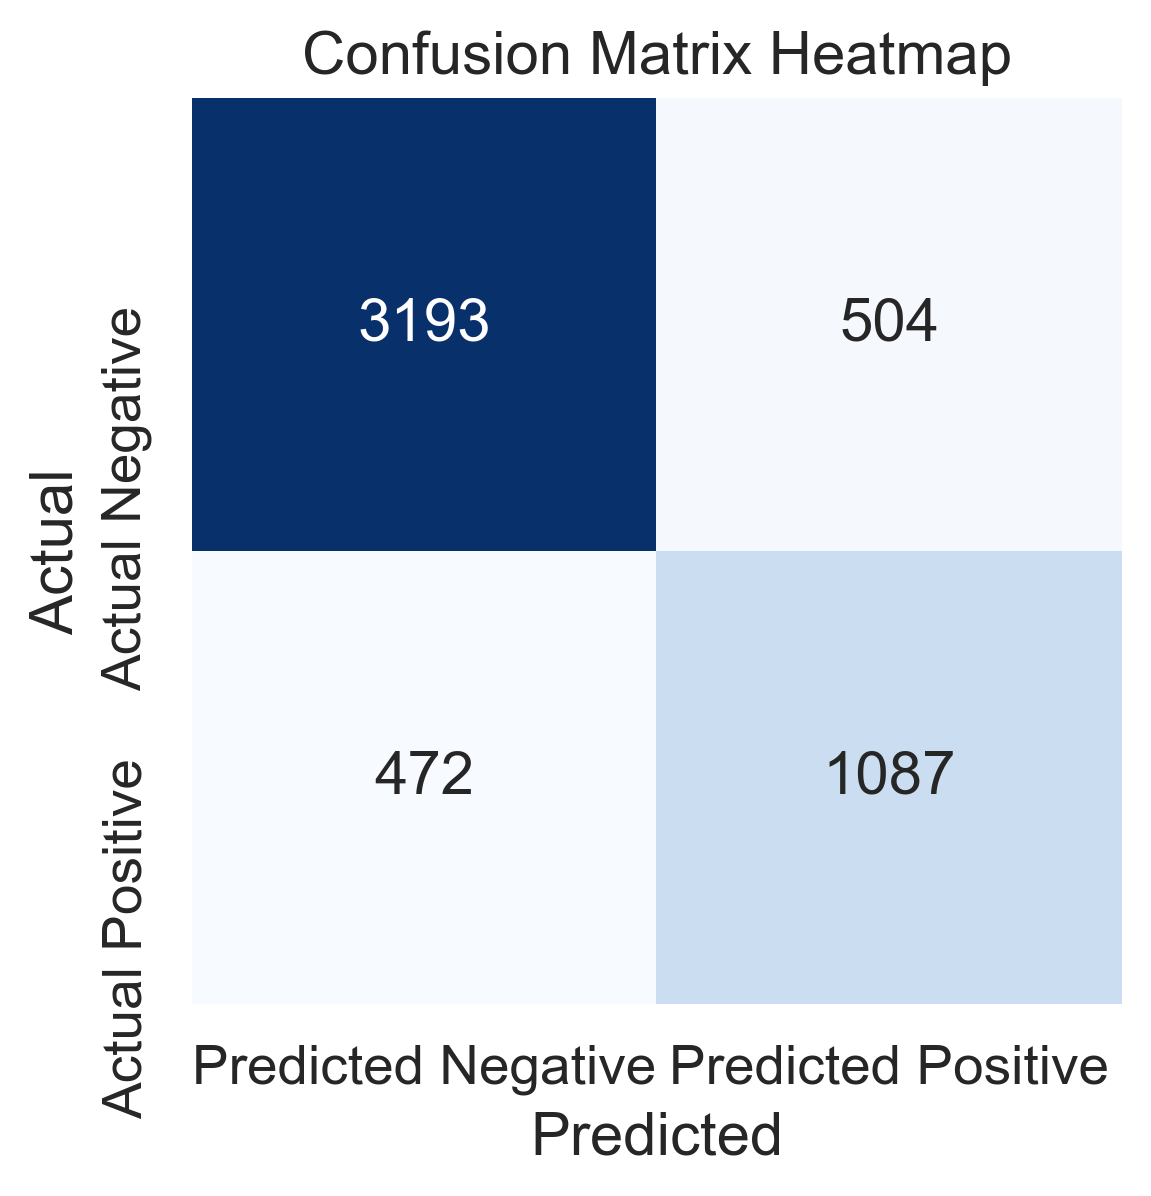

Compile time  0.0


In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Step 5: Make predictions on the test set
y_test_pred = model.predict(X_test)

# Step 6: Compute confusion matrices and evaluate the model on both validation and test sets
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Step 7: Display the confusion matrices
print("Confusion Matrix (Validation Set):\n", conf_matrix_valid)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

# You can also compute and print accuracy and classification reports for both sets
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

report_valid = classification_report(y_valid, y_valid_pred)
report_test = classification_report(y_test, y_test_pred)

print("Accuracy (Validation Set):", accuracy_valid)
print("Classification Report (Validation Set):\n", report_valid)

print("Accuracy (Test Set):", accuracy_test)
print("Classification Report (Test Set):\n", report_test)
plt.figure(figsize=(4,4),dpi=300)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
st=time.time()
et=time.time()
compile_time=et-st
print("Compile time ",compile_time)


Random forest 

<ipython-input-31-22c2c5879b40>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Confusion Matrix (Validation Set):
 [[3355  332]
 [ 464 1105]]
Confusion Matrix (Test Set):
 [[3386  311]
 [ 442 1117]]
Accuracy (Validation Set): 0.8485540334855404
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      3687
           1       0.77      0.70      0.74      1569

    accuracy                           0.85      5256
   macro avg       0.82      0.81      0.81      5256
weighted avg       0.85      0.85      0.85      5256

Accuracy (Test Set): 0.8567351598173516
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      3697
           1       0.78      0.72      0.75      1559

    accuracy                           0.86      5256
   macro avg       0.83      0.82      0.82      5256
weighted avg       0.85      0.86      0.85      5256



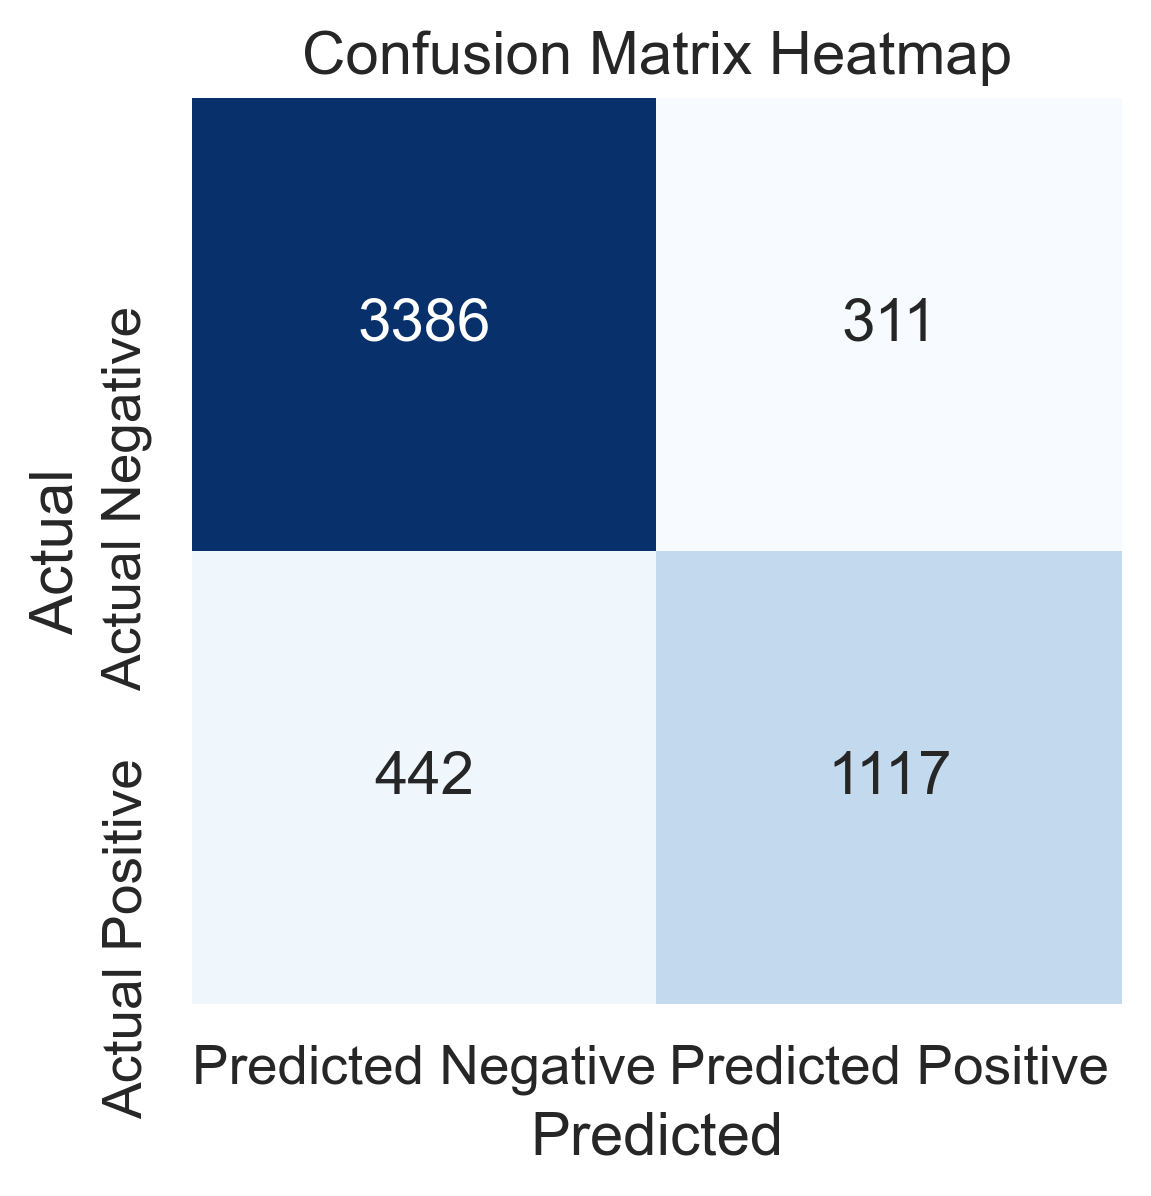

Compile time  0.0


In [31]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Step 5: Make predictions on the test set
y_test_pred = model.predict(X_test)

# Step 6: Compute confusion matrices and evaluate the model on both validation and test sets
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Step 7: Display the confusion matrices
print("Confusion Matrix (Validation Set):\n", conf_matrix_valid)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

# You can also compute and print accuracy and classification reports for both sets
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

report_valid = classification_report(y_valid, y_valid_pred)
report_test = classification_report(y_test, y_test_pred)

print("Accuracy (Validation Set):", accuracy_valid)
print("Classification Report (Validation Set):\n", report_valid)

print("Accuracy (Test Set):", accuracy_test)
print("Classification Report (Test Set):\n", report_test)
plt.figure(figsize=(4,4),dpi=300)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
st=time.time()
et=time.time()
compile_time=et-st
print("Compile time ",compile_time)

In [32]:
from sklearn.naive_bayes import GaussianNB

Naive bayes

Confusion Matrix (Validation Set):
 [[3060  627]
 [ 386 1183]]
Confusion Matrix (Test Set):
 [[3110  587]
 [ 384 1175]]
Accuracy (Validation Set): 0.8072678843226788
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      3687
           1       0.65      0.75      0.70      1569

    accuracy                           0.81      5256
   macro avg       0.77      0.79      0.78      5256
weighted avg       0.82      0.81      0.81      5256

Accuracy (Test Set): 0.8152587519025876
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      3697
           1       0.67      0.75      0.71      1559

    accuracy                           0.82      5256
   macro avg       0.78      0.80      0.79      5256
weighted avg       0.82      0.82      0.82      5256



C:\Users\Mahum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


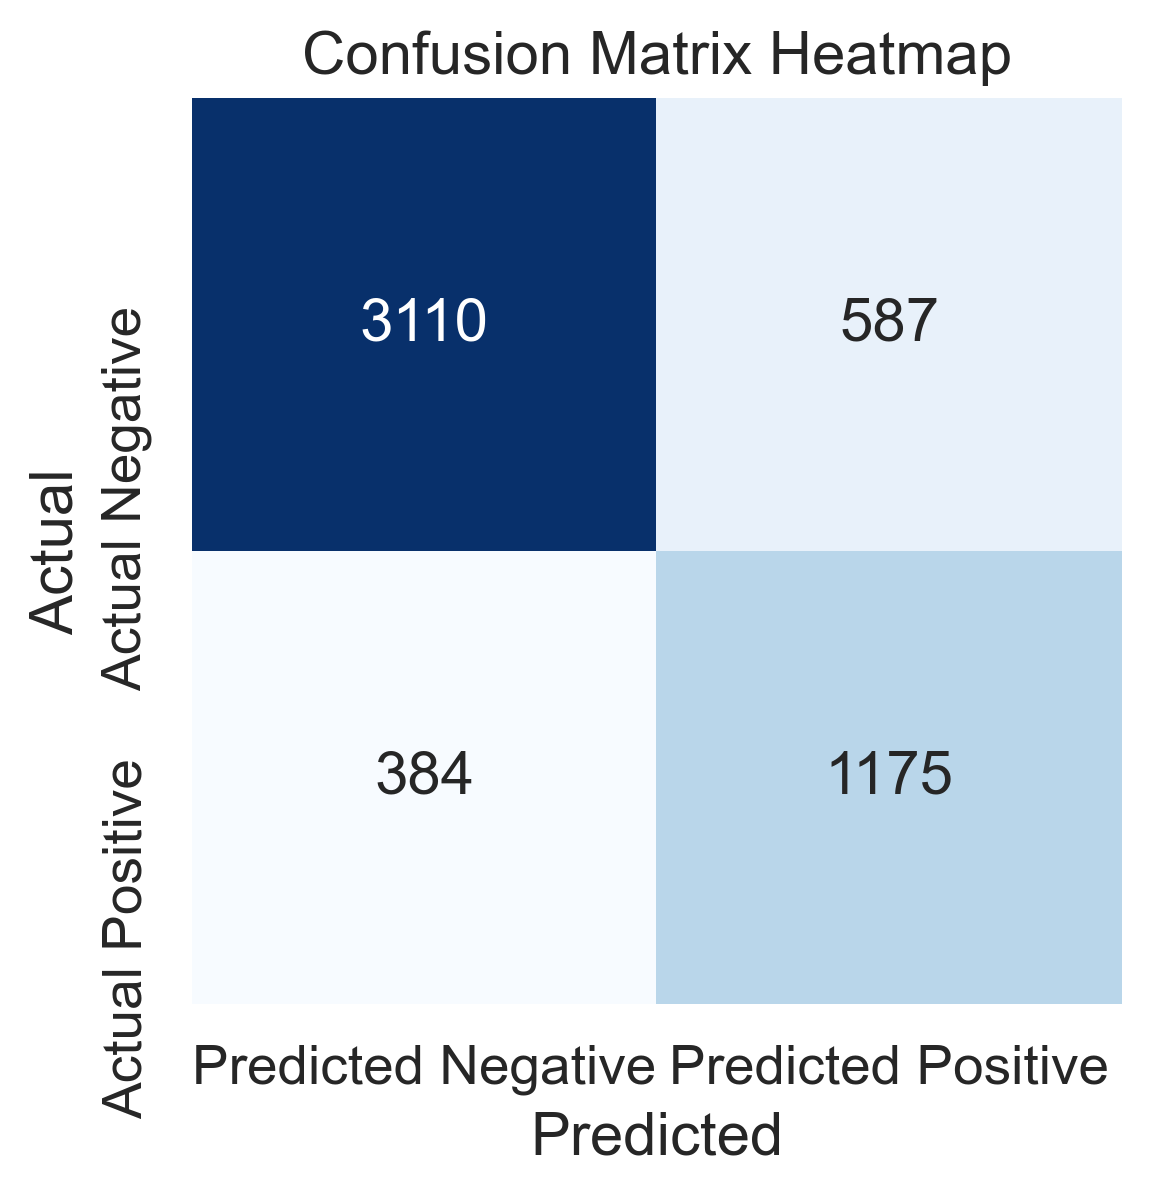

Compile time  0.0010519027709960938


In [33]:



model = GaussianNB()

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

# Step 5: Make predictions on the test set
y_test_pred = model.predict(X_test)

# Step 6: Compute confusion matrices and evaluate the model on both validation and test sets
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Step 7: Display the confusion matrices
print("Confusion Matrix (Validation Set):\n", conf_matrix_valid)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)

# You can also compute and print accuracy and classification reports for both sets
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

report_valid = classification_report(y_valid, y_valid_pred)
report_test = classification_report(y_test, y_test_pred)

print("Accuracy (Validation Set):", accuracy_valid)
print("Classification Report (Validation Set):\n", report_valid)

print("Accuracy (Test Set):", accuracy_test)
print("Classification Report (Test Set):\n", report_test)

plt.figure(figsize=(4,4),dpi=300)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
st=time.time()
et=time.time()
compile_time=et-st
print("Compile time ",compile_time)